# 18기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.
데이터셋 출처 :  https://www.kaggle.com/datasets/shenba/time-series-datasets

### Box-Jenkins 방법론
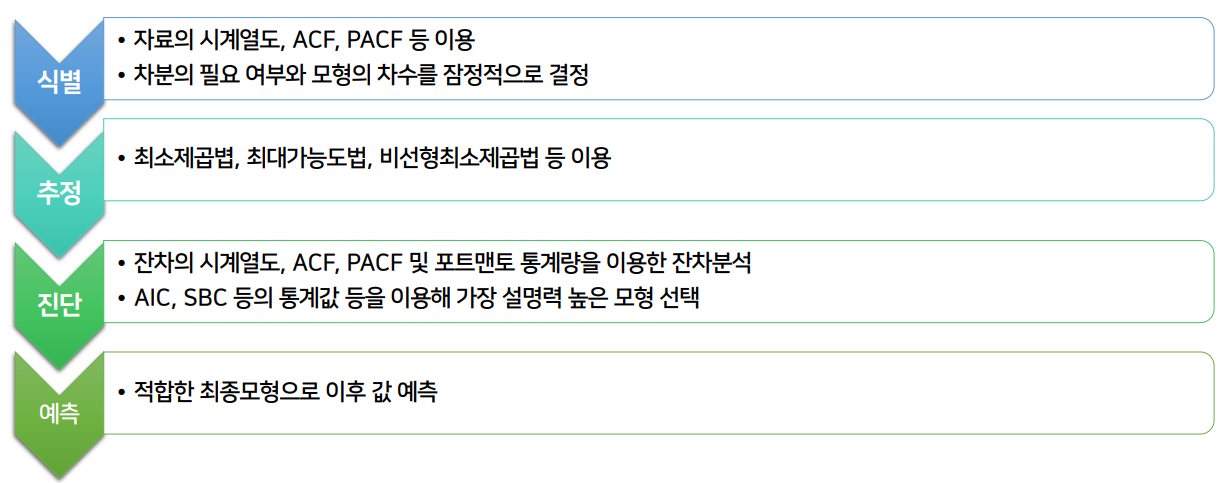
대략적 흐름 예시를 확인하고 싶다면 첨부한 '시계열자료_참고자료.pdf'를 읽어주세요.

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [7]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

## 데이터 불러오기

In [8]:
df = pd.read_csv('./Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [11]:
df.DATE = pd.to_datetime(df.DATE) #datetime으로 만들어주기

In [12]:
df = df.set_index("DATE") #DATE 변수를 인덱스로
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [13]:
df.index.freq = 'MS'

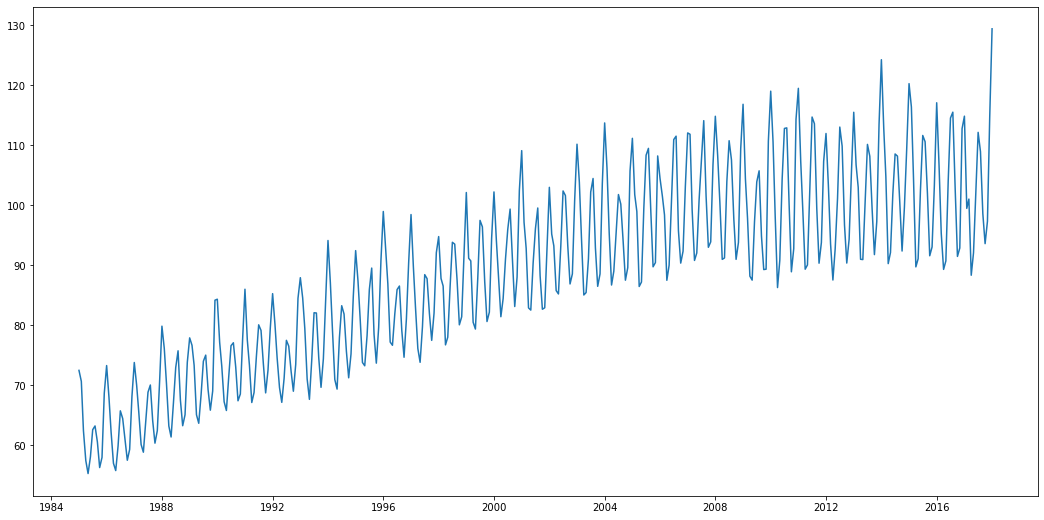

In [15]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["IPG2211A2N"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

### 선형추세를 보인다

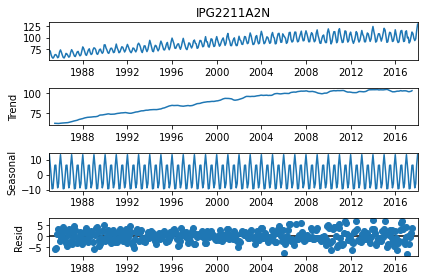

In [16]:
a = seasonal_decompose(df["IPG2211A2N"], model = "add")
a.plot();

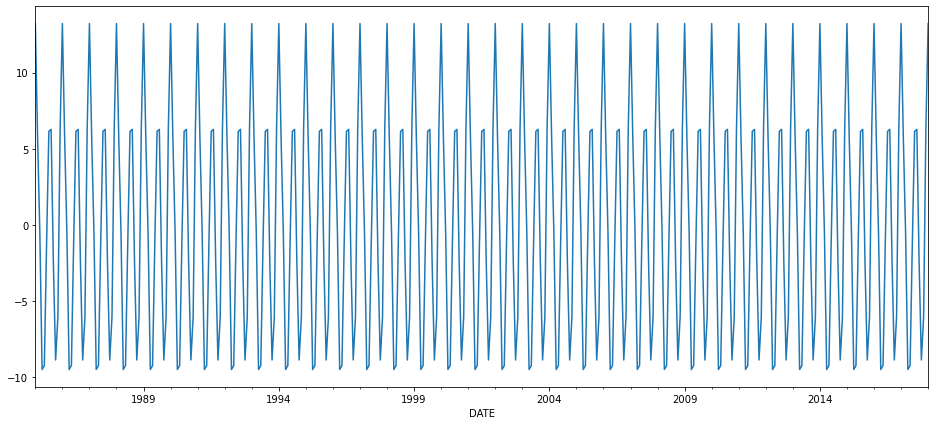

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

In [19]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [24]:
arima_model = SARIMAX(train_data['IPG2211A2N'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                 IPG2211A2N   No. Observations:                  385
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -876.001
Date:                                    Tue, 23 Aug 2022   AIC                           1774.001
Time:                                            20:21:43   BIC                           1817.458
Sample:                                        01-01-1985   HQIC                          1791.238
                                             - 01-01-2017                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5337      0.052     10.248      0.000       0.432       0.636
ar.L2         -0.0752      0.053     -1.417      0.156      -0.179       0.029
ma.L1         -0.9458      0.020    -46.759      0.000      -0.985      -0.906
ar.S.L12       0.5981      0.541      1.105      0.269      -0.463       1.659
ar.S.L24       0.6936      0.742      0.935      0.350      -0.760       2.147
ar.S.L36      -0.5610      0.425     -1.321      0.186      -1.393       0.271
ar.S.L48       0.2613      0.154      1.695      0.090      -0.041       0.563
ma.S.L12      -0.3097      0.565     -0.548      0.583      -1.417       0.797
ma.S.L24      -0.7778      0.626     -1.242      0.214      -2.005       0.449
ma.S.L36       0.4921      0.272      1.811      0.070      -0.040       1.025
sigma2         5.0833      0.383     13.257      0.000       4.332       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2017-02-01    106.002729
2017-03-01     98.352282
2017-04-01     89.773975
2017-05-01     91.986739
2017-06-01    103.133350
2017-07-01    112.741831
2017-08-01    111.778577
2017-09-01    100.647190
2017-10-01     91.890100
2017-11-01     95.780263
2017-12-01    111.067729
2018-01-01    118.181432
Freq: MS, Name: ARIMA Predictions, dtype: float64

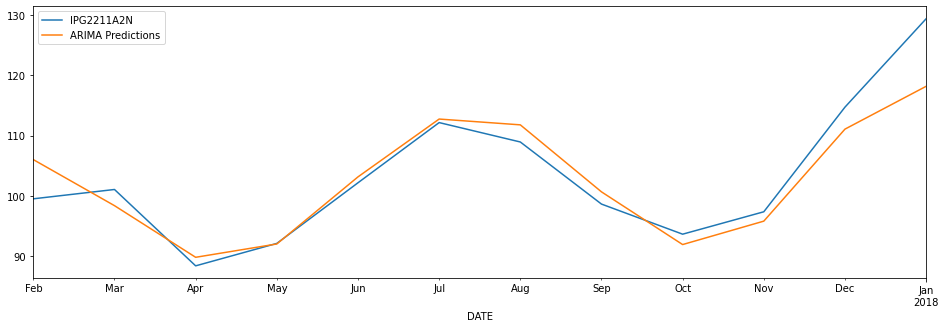

In [26]:
test_data['IPG2211A2N'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [28]:
arima_rmse_error = rmse(test_data['IPG2211A2N'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['IPG2211A2N'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 17.49240175597969
RMSE Error: 4.182391870207727
Mean: 88.84721763224181


In [29]:
test_data['ARIMA_Predictions'] = arima_pred

### Prophet Forecast

In [30]:
df_pr = df.copy()
df_pr = df.reset_index()

In [31]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [32]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [36]:
!pip install fbprophet

     ---------------------------------------- 64.0/64.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 91.8/91.8 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 79.8/79.8 MB 8.1 MB/s eta 0:00:00
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Running setup.py install for fbprophet: started
  Running setup.py install for fbprophet: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [45 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\rhskr\AppData\Local\Temp\pip-install-zaynvtg3\fbprophet_a8c40f78e2074ccbb111004d897048dc\setup.py", line 122, in <module>
      setup(
    File "c:\users\rhskr\anaconda3\lib\site-packages\setuptools\__init__.py", line 153, in setup
      return distutils.core.setup(**attrs)
    File "c:\users\rhskr\anaconda3\lib\distutils\core.py", line 148, in setup
      dist.run_commands()
    File "c:\users\rhskr\anaconda3\lib\distutils\dist.py", line 966, in run_commands
      self.run_command(cmd)
    File "c:\users\rhskr\anaconda3\lib\distutils

In [39]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [38]:
import fbprophet
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

ModuleNotFoundError: No module named 'fbprophet'